In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-housing-dataset/HousingData.csv


In [2]:
data = pd.read_csv('/kaggle/input/boston-housing-dataset/HousingData.csv')

In [3]:
df = pd.DataFrame(data)

print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [4]:
missing_col = df.isna().sum()

missing_col

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
# column with na
na_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']


# fill na with the mean balue of that column
df[na_columns] = df[na_columns].fillna(df[na_columns].mean())
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [6]:
missing_col = df.isna().sum()

missing_col

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
y = df['MEDV']
x = df.drop(columns=['MEDV'])
x.shape

(506, 13)

In [8]:
y.shape

(506,)

In [9]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.33,random_state=42)

In [10]:
train_x.shape

(339, 13)

In [11]:
from sklearn.tree import DecisionTreeRegressor

treemodel = DecisionTreeRegressor()

In [12]:
treemodel.fit(train_x, train_y)

DecisionTreeRegressor()

In [13]:
pred_y = treemodel.predict(test_x)
pred_y

array([24.4, 32. , 15.2, 20.3, 15.2, 28.1, 16.6, 17.8, 23.2, 21.2, 18.8,
       18.8, 10.5, 28.1, 16.2, 25. , 17.3,  5.6, 44. , 17.8, 24.4, 24.7,
       13.6, 28.7, 15.4, 16.7, 19.6, 14.1, 16.6, 24.5, 18.8, 24.7, 50. ,
       21.7, 16.7, 13.1, 36.4, 18.5, 21.7, 25. , 19.8, 28.4, 44. , 19.6,
       22. , 15.4, 13.6, 28.1, 20. , 28.7, 22.6, 37.3, 20. , 23.9, 43.8,
       20.6, 14.9, 27.9, 22.9, 16.6, 27.1, 29. , 29.8, 18.2, 24.8, 14.4,
       10.9, 23.3, 27.9, 14.1, 21.1, 23.9,  8.4, 22.2, 28.1,  7.2, 19.8,
       44. , 13.3,  8.1, 21.2, 11.9, 21.9,  8.3, 20.3, 25.1, 19. , 23. ,
       22.9, 18. , 21.7,  8.3, 19.2, 17.5, 12.3, 19.2, 50. , 11.9, 16.7,
       11.9, 22. , 28.1, 14.6, 20.4, 22. , 11.9, 20.4, 24.8, 19. , 24.1,
        7.2, 14.5, 22.2, 21.4, 31.7, 13.5, 46. , 14.8, 15.3, 23.7, 16.2,
       25. ,  7.2, 18.5, 28.1, 22.7, 24.1, 37.2, 13.1, 50. , 21.4, 19.3,
       18.2, 16.7, 14.6, 20.6, 19. , 30.1, 31.1, 13.6, 16.6, 23.7, 21.9,
       21.7,  5.6, 23. , 13.1, 22.6, 13.6, 44.8, 19

In [14]:
from sklearn.metrics import r2_score

print(r2_score(pred_y,test_y))

0.7234677547385857


In [15]:
from sklearn.tree import DecisionTreeRegressor

treemodel = DecisionTreeRegressor()

In [16]:
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [17]:
from sklearn.model_selection import GridSearchCV

regressorcv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='neg_mean_squared_error')





In [18]:
regressorcv.fit(train_x,train_y)

/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/si

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [19]:
regressorcv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 11,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [20]:
y_pred=regressorcv.predict(test_x)
y_pred

array([22.70555556, 33.1       , 15.2       , 20.73478261, 16.7       ,
       19.2       , 27.1       , 16.26      , 23.95714286, 20.73478261,
       23.7       , 27.1       ,  5.6       , 22.03333333, 20.73478261,
       23.95714286, 17.3       , 13.8       , 42.8       , 14.2       ,
       22.70555556, 29.4       , 13.2       , 20.73478261, 12.7       ,
       13.5       , 19.2       , 14.1       , 23.7       , 20.73478261,
       21.225     , 20.73478261, 17.33333333, 23.95714286, 16.7       ,
       21.5       , 33.925     , 20.73478261, 22.4       , 20.73478261,
       16.26      , 27.56666667, 42.8       , 21.63333333, 22.70555556,
       14.75      , 13.5       , 20.73478261, 12.7       , 33.925     ,
       21.63333333, 27.56666667, 13.2       , 20.73478261, 23.9       ,
       23.95714286, 14.2       , 27.9       , 18.56      , 19.5       ,
       22.925     , 31.83846154, 36.1       , 20.73478261, 25.5       ,
       23.7       , 10.        , 21.16666667, 33.925     , 19.  

In [21]:
from sklearn.metrics import r2_score

print(r2_score(y_pred,test_y))

0.4199683579676132


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


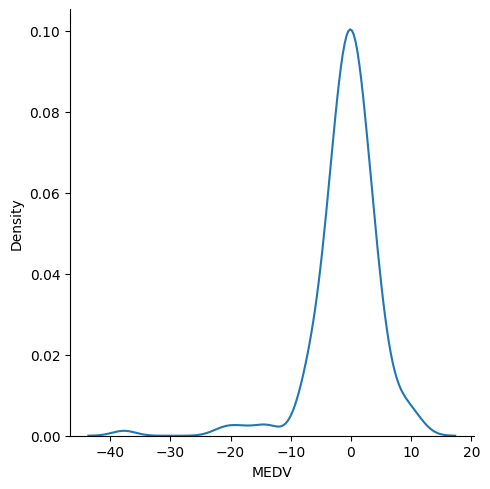

In [22]:
import seaborn as sns
sns.displot(y_pred-test_y, kind='kde')